In [1]:
from pandas.plotting import scatter_matrix
import pandas as pd
df = pd.read_csv('MDD_NEWW.csv')
df.head()

,Sex,Age,Education,MDD_Severity,ID
0,2,36,18.0,Moderate,S1-1-0001
1,2,28,15.0,Moderate,S1-1-0002
2,2,55,11.0,Moderate,S1-1-0003
3,2,48,8.0,Moderate,S1-1-0004
4,1,21,13.0,Moderate,S1-1-0005


In [2]:
from pandas.plotting import scatter_matrix
import pandas as pd
from matplotlib import cm
feature_names = ['Sex', 'Age', 'Education']
X = df[feature_names]
y = df["MDD_Severity"]

In [3]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

Class=1, n=521 (57.506%)
Class=0, n=285 (31.457%)
Class=2, n=83 (9.161%)
Class=3, n=17 (1.876%)


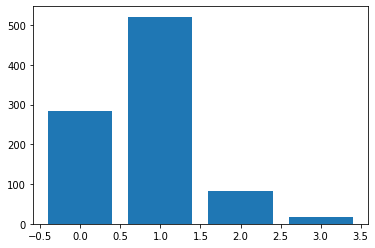

In [6]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
# label encode the target variable
y_train = LabelEncoder().fit_transform(y_train)

# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

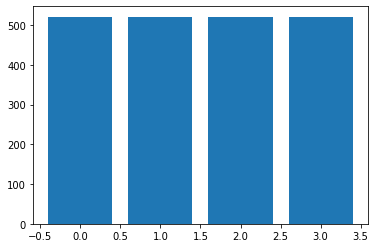

In [7]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_res)
for k,v in counter.items():
    per = v / len(y_res) * 100
    
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [8]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
#y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
#y_res = tf.keras.utils.to_categorical(y_res, num_classes=4)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

for i,item in enumerate(le.classes_):
    print(item, '--->',i)

Mild ---> 0
Moderate ---> 1
Remission ---> 2
Severe ---> 3


In [9]:
print("X_train Shape: ", X_res.shape) 
print("X_test Shape: ", X_test.shape) 
print("y_train Shape: ", y_res.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (2084, 3)
X_test Shape:  (227, 3)
y_train Shape:  (2084,)
y_test Shape:  (227,)


In [10]:
y_res

array([1, 1, 1, ..., 3, 3, 3])

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 30, 50, 70, 90, 150, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 600, 1000, 1200, 1600, 2000]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)

In [30]:
# Fit the grid search to the data
#grid_search.fit(X_res, y_res)
#grid_search.best_params_

{'bootstrap': False,
 'max_depth': 150,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [31]:
#developing a model
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 103,
                               max_depth=8, min_samples_leaf=3)
clf_pruned.fit(X_res, y_res)
#Predict the response for test dataset
y_pred_p= clf_pruned.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_p))

Accuracy: 0.5418502202643172


In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_res, y_res)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_res, y_res)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.43
Accuracy of Logistic regression classifier on test set: 0.31


In [51]:
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors=3, p=3, metric='minkowski'
KNN=KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
 metric_params=None, n_jobs=4, n_neighbors=1, p=5,
 weights='uniform')
KNN.fit(X_res, y_res)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(KNN.score(X_res, y_res)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(KNN.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.45


In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3, solver='lsqr',shrinkage=0.1)
lda.fit(X_res, y_res)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_res, y_res)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.44
Accuracy of LDA classifier on test set: 0.35


In [69]:
from sklearn.svm import SVC
SVM=SVC(kernel='rbf',gamma=10000, C=100.0, random_state=103)
SVM.fit(X_res, y_res)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(SVM.score(X_res, y_res)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(SVM.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.46


In [88]:
rnd_clf = RandomForestClassifier(bootstrap= False,
 max_depth=100,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split=9,
 n_estimators= 20)

rnd_clf.fit(X_res, y_res)
# evaluate the model
Y_PRED= rnd_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, Y_PRED))


Accuracy: 0.5066079295154186


In [148]:
import shap

row = 33
data_for_prediction = X_test.iloc[row]  # use 1 arbitrary row of data
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_for_prediction)

In [149]:
y_pred[row],y_test[row]

(array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32))

In [150]:
#local interpretability
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)
#biggest impact from education (longest)


In [151]:
explainer = shap.TreeExplainer(clf, model_output='probability', feature_perturbation='interventional', data=X_train)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [152]:
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value[0], shap_values[0],data_for_prediction)
#biggest impact from education, which is pushing it away from base value


In [155]:
print(features)

     Sex  Age  Education
783    2   29       13.0
898    1   22       11.0
413    2   63        7.0
467    2   19       15.0
745    2   74       15.0
..   ...  ...        ...
380    1   31        9.0
260    1   28       15.0
332    2   47       13.0
985    2   51        9.0
361    2   23       12.0

[100 rows x 3 columns]


In [159]:
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value[0], shap_values[0])
#model output value is 0.12 and base value is 0.1865 ( value which would be predicted if we din't have any features 
#for the current output)
#Feature’s impacts on the model: the bigger the arrow, the bigger the impact.
#How a feature impacts the model: a red arrow pushes the outcome to the right (increases the model output value) 
#while a blue arrow pushes the model outcome to the left (decreases the model output value).
#We can see, for the first observation,Sex has the most impact

In [157]:
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value[0], shap_values[0])
data_for_prediction


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [160]:
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value[0], shap_values[0],data_for_prediction)


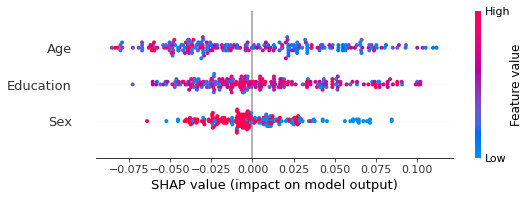

In [161]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# feature rankings based on SHAP values on a per class basis. For class 1 this will be
shap.summary_plot(shap_values[1], X_test)  #This plot shows order of influence of variables, Age being most influential. 
#It is spread over a wide range of values. All three features have a negative impact on the model

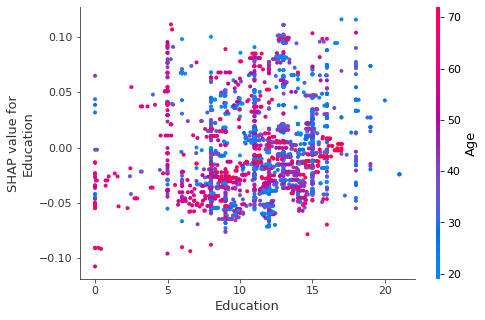

In [162]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('Education', shap_values[1], X, interaction_index="Age")